In [1]:
########################################
## 1) Load Libraries
########################################
library(dplyr)
library(tidyr)
library(challengeR)
library(readr)

########################################
## 2) Get all model directories
########################################
parent_dir <- "./totalsegmentator_results"
model_dirs <- list.dirs(parent_dir, recursive = FALSE)

# Define the organs you expect (should match the column names in each dsc.csv)
organs <- c("aorta", "gall_bladder", "kidney_left", "kidney_right",
            "liver", "pancreas", "postcava", "spleen", "stomach")

########################################
## 3) Read and combine DSC.csv files from all models
########################################
all_data_long <- data.frame()

for (mdir in model_dirs) {
  csv_file <- file.path(mdir, "dsc.csv")

  if (!file.exists(csv_file)) {
    message("Skipping ", mdir, ": dsc.csv not found.")
    next
  }

  # Read the CSV file (each file should have a 'name' column and columns for organs)
  df_wide <- read_csv(csv_file, show_col_types = FALSE)

  if (!"name" %in% names(df_wide)) {
    message("Skipping ", csv_file, ": 'name' column not found.")
    next
  }

  # Pivot the data from wide to long format: each row = one case & one organ
  df_long <- df_wide %>%
    pivot_longer(
      cols = -name,
      names_to = "organ",
      values_to = "dsc"
    )

  # Keep only the organs of interest
  df_long <- df_long %>%
    filter(organ %in% organs)

  # Add a column for the algorithm name (using the directory name)
  df_long <- df_long %>%
    mutate(Algorithm = basename(mdir))

  # Append this model's data to the master data frame
  all_data_long <- bind_rows(all_data_long, df_long)
}

########################################
## 4) Create a challenge object
########################################
# Each row is a case for a particular organ (task) and algorithm
my_challenge <- as.challenge(
  object      = all_data_long,
  case        = "name",
  algorithm   = "Algorithm",
  value       = "dsc",
  by          = "organ",    # Each organ is treated as a separate task
  smallBetter = FALSE,      # DSC: higher is better
  na.treat    = "na.rm",    # Remove rows with NA automatically
  check       = TRUE
)

########################################
## 5) Compute aggregated metrics (mean and standard deviation)
########################################
mean_obj <- aggregate(my_challenge, FUN = "mean", na.treat = "na.rm")
sd_obj   <- aggregate(my_challenge, FUN = "sd",   na.treat = "na.rm")

# Get the list of organs for which results are available
organs_present <- names(mean_obj$matlist)

########################################
## 6) Build a combined result table with "mean ± sd"
########################################
res_table <- data.frame()

for (org in organs_present) {
  df_mean <- mean_obj$matlist[[org]]
  df_sd   <- sd_obj$matlist[[org]]

  # The aggregate function places the computed value in the last column
  col_mean <- colnames(df_mean)[ncol(df_mean)]
  col_sd   <- colnames(df_sd)[ncol(df_sd)]

  tmp <- data.frame(
    Algorithm = rownames(df_mean),
    organ     = org,
    DSC_mean  = df_mean[[col_mean]],
    DSC_sd    = df_sd[[col_sd]]
  )

  # Format as "mean ± sd" (multiplying by 100 to express as percentage)
  tmp$DSC_string <- sprintf("%.1f ± %.1f", 100 * tmp$DSC_mean, 100 * tmp$DSC_sd)

  res_table <- rbind(res_table, tmp)
}

# Reshape to a wide table: one row per Algorithm, one column per organ
final_table <- res_table %>%
  select(Algorithm, organ, DSC_string) %>%
  pivot_wider(
    names_from  = organ,
    values_from = DSC_string
  ) %>%
  arrange(Algorithm)

########################################
## 7) Print the full table (all rows & columns)
########################################
print(final_table, n = Inf, width = Inf)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: purrr


challengeR 1.0.5 loaded. 

Please cite as:
   Wiesenfarth, M., Reinke, A., Landman, B.A., Eisenmann, M., Aguilera Saiz, L., Cardoso, M.J., Maier-Hein, L. and Kopp-Schneider, A. Methods and open-source toolkit for analyzing and visualizing challenge results. Sci Rep 11, 2369 (2021). https://doi.org/10.1038/s41598-021-82017-6



Attaching package: 'challengeR'


The following object is masked from 'package:base':

    rank


Skipping ./totalsegmentator_results/final_14dec2024_results: dsc.csv not found.

Note: 2449 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases in task 'aorta'.
Therefore, missings have been inserted in the following cases:



            Algorithm  name
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

Note: 244911416 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases in task 'gall_bladder'.
Therefore, missings have been inserted in the following cases:



            Algorithm  name
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

Note: 2449114168414 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases in task 'kidney_left'.
Therefore, missings have been inserted in the following cases:



            Algorithm  name
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

Note: 24491141684148792 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases in task 'kidney_right'.
Therefore, missings have been inserted in the following cases:



            Algorithm  name
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

Note: 244911416841487925624 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases in task 'liver'.
Therefore, missings have been inserted in the following cases:



            Algorithm  name
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

Note: 2449114168414879256248414 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases in task 'pancreas'.
Therefore, missings have been inserted in the following cases:



            Algorithm  name
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

Note: 24491141684148792562484144922 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases in task 'postcava'.
Therefore, missings have been inserted in the following cases:



            Algorithm  name
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

Note: 244911416841487925624841449226577 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases in task 'spleen'.
Therefore, missings have been inserted in the following cases:



            Algorithm  name
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

Note: 2449114168414879256248414492265776279 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases in task 'stomach'.
Therefore, missings have been inserted in the following cases:



            Algorithm  name
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.



# A tibble: 19 x 10
   Algorithm                       aorta              gall_bladder      
   <chr>                           <chr>              <chr>             
 1 MONAI_LHU-Net                   63.0 <U+00B1> 34.1 71.3 <U+00B1> 32.2
 2 MONAI_SegVol                    60.8 <U+00B1> 29.8 68.1 <U+00B1> 29.3
 3 MONAI_Swin_UNETR                54.5 <U+00B1> 37.0 50.6 <U+00B1> 40.6
 4 MONAI_UCTransNet                49.7 <U+00B1> 34.8 69.6 <U+00B1> 31.9
 5 MONAI_UNEST                     54.7 <U+00B1> 37.0 50.3 <U+00B1> 40.0
 6 MONAI_UNETR                     41.0 <U+00B1> 31.4 40.0 <U+00B1> 36.9
 7 Vision_Language_Swin_UNETR_CLIP 58.6 <U+00B1> 34.5 70.3 <U+00B1> 31.0
 8 Vision_Language_U-Net_CLIP      59.0 <U+00B1> 32.8 73.1 <U+00B1> 29.1
 9 _Diff-UNet                      61.0 <U+00B1> 34.5 71.8 <U+00B1> 30.0
10 _MedFormer                      70.3 <U+00B1> 28.0 74.1 <U+00B1> 26.8
11 _SAM-Adapter                    15.2 <U+00B1> 18.6 11.5 <U+00B1> 17.6
12 nnU-Net_MedNeXt             

Processing organ: aorta

Note: 2449 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.

Processing organ: gall_bladder

Note: 11416 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.

Processing organ: kidney_left

Note: 8414 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.

Processing organ: kidney_right

Note: 8792 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.

Processing organ: liver

Note: 5624 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.

Processing organ: pancreas

Note: 8414 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.

Processing organ: postcava

Note: 4922 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.

Processing organ: spleen

Note: 6577 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.

Processing organ: stomach

Note: 6279 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.



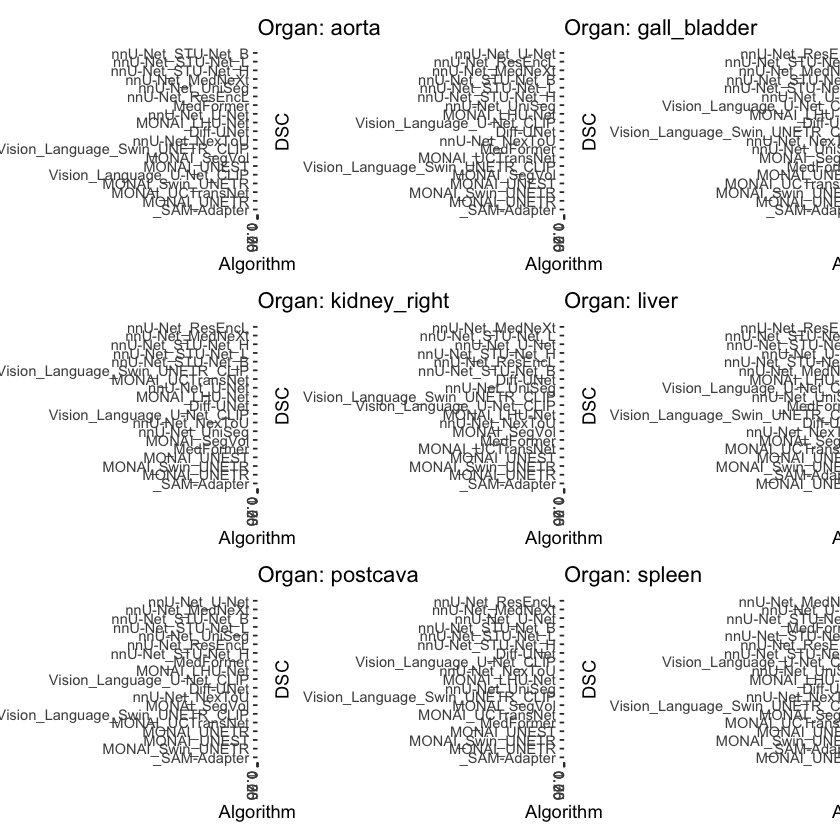

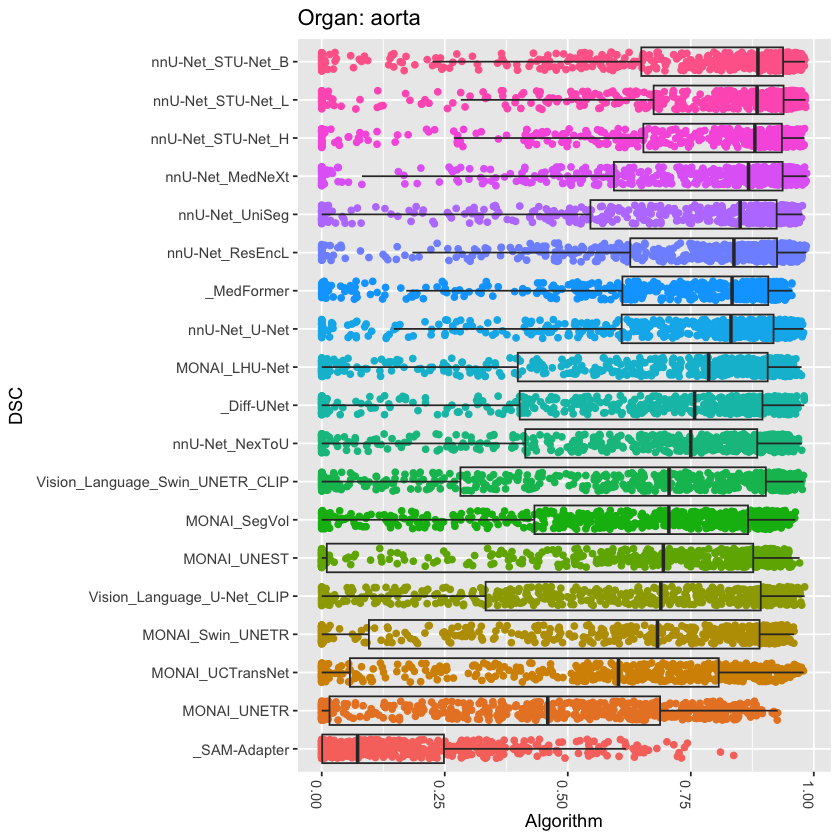

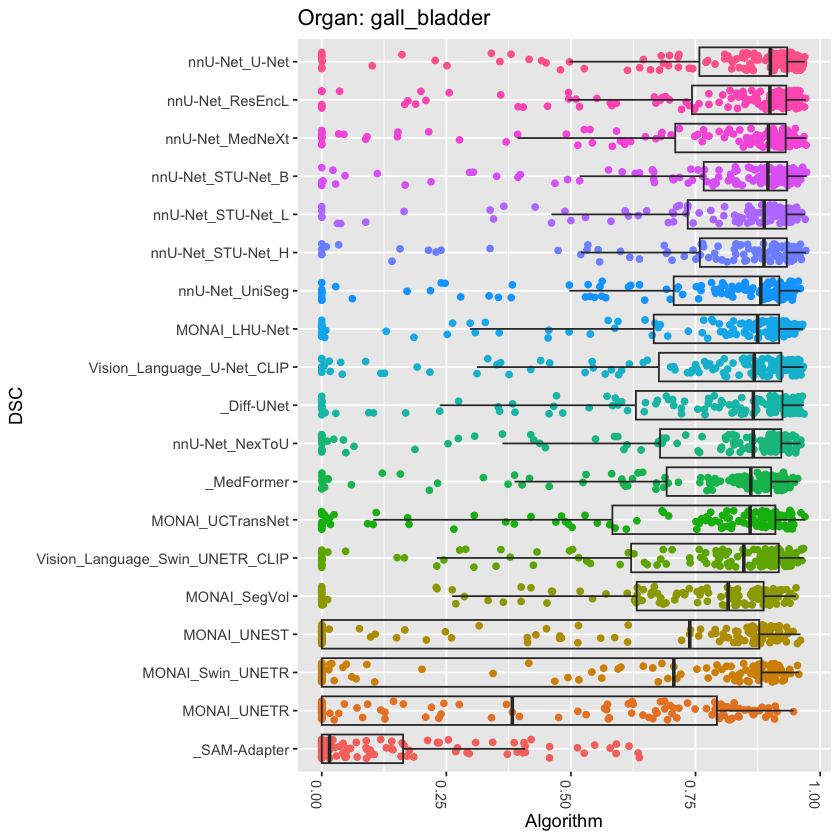

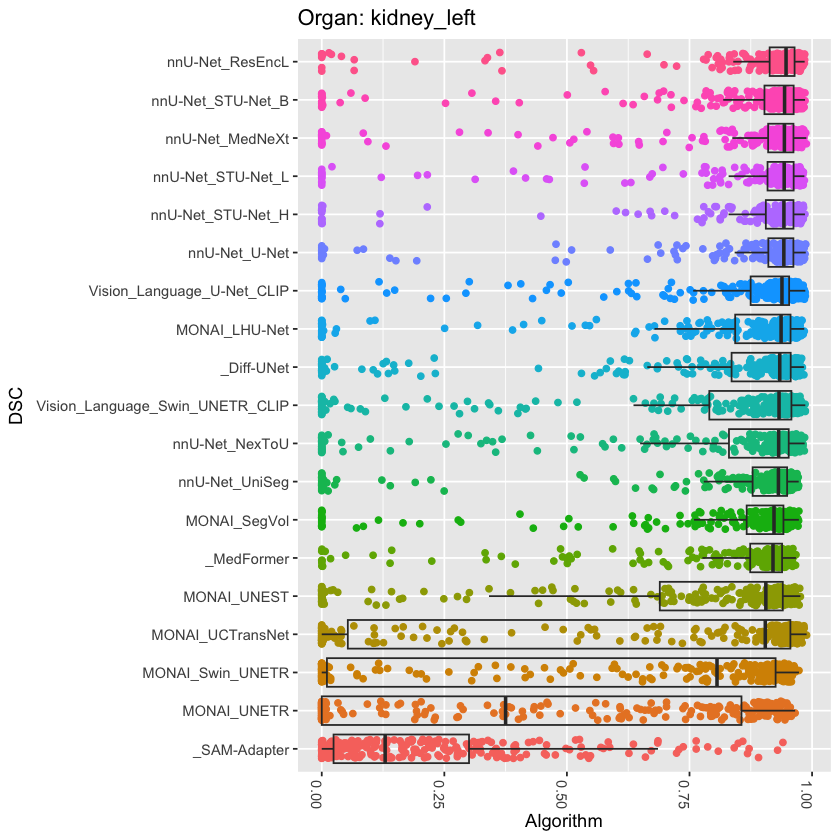

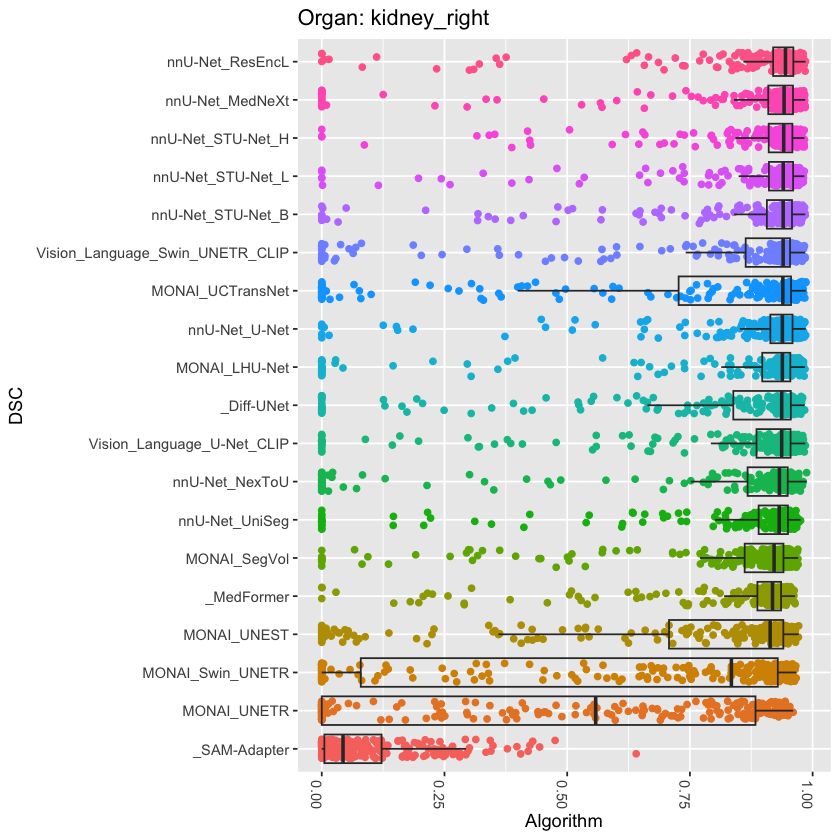

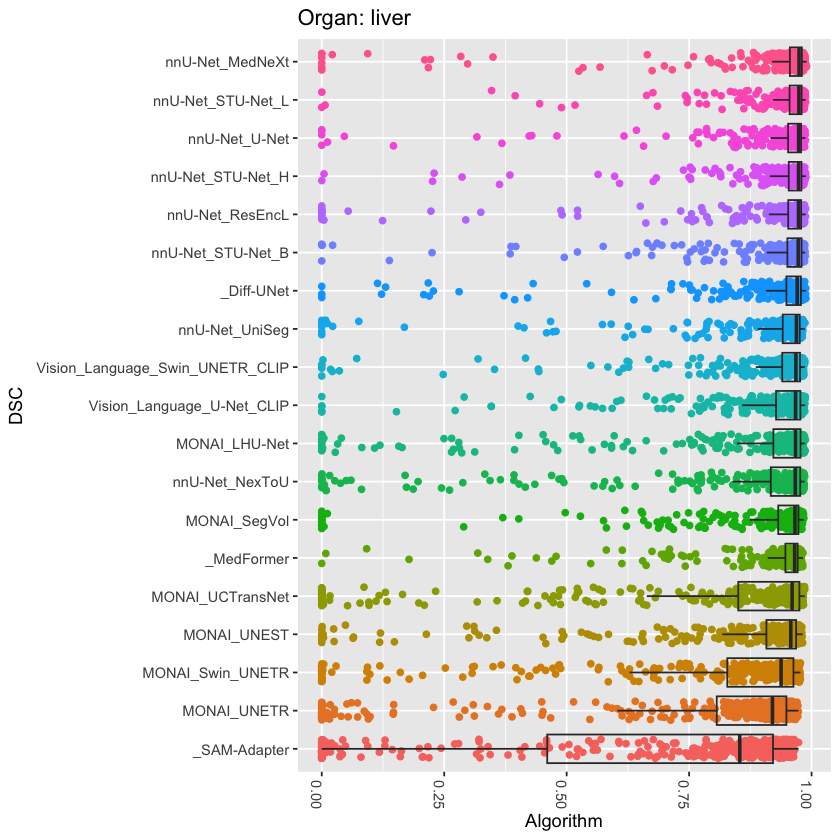

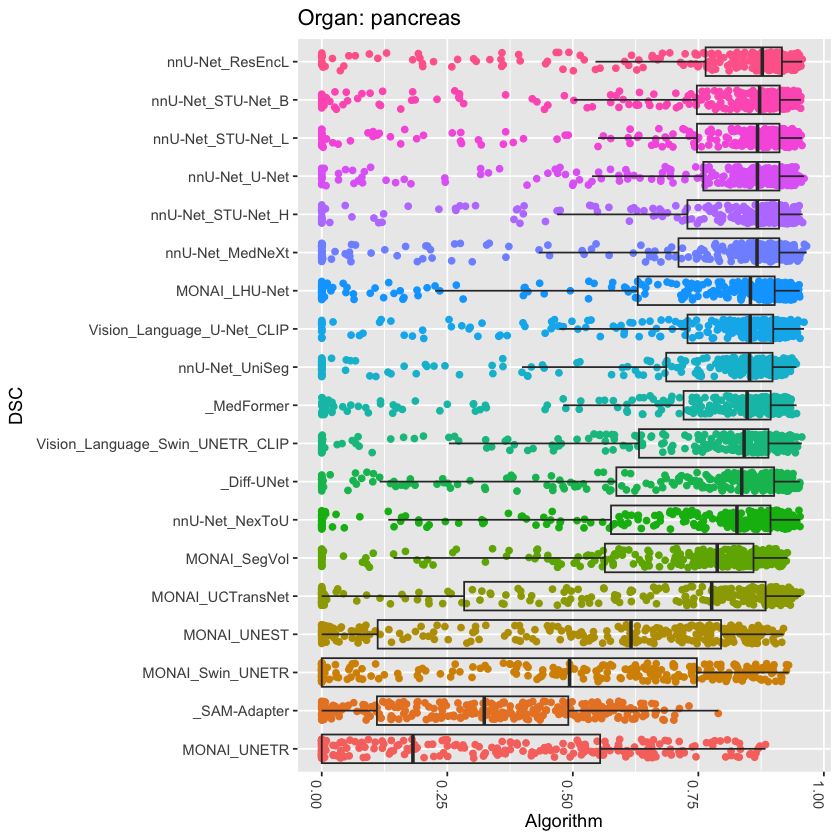

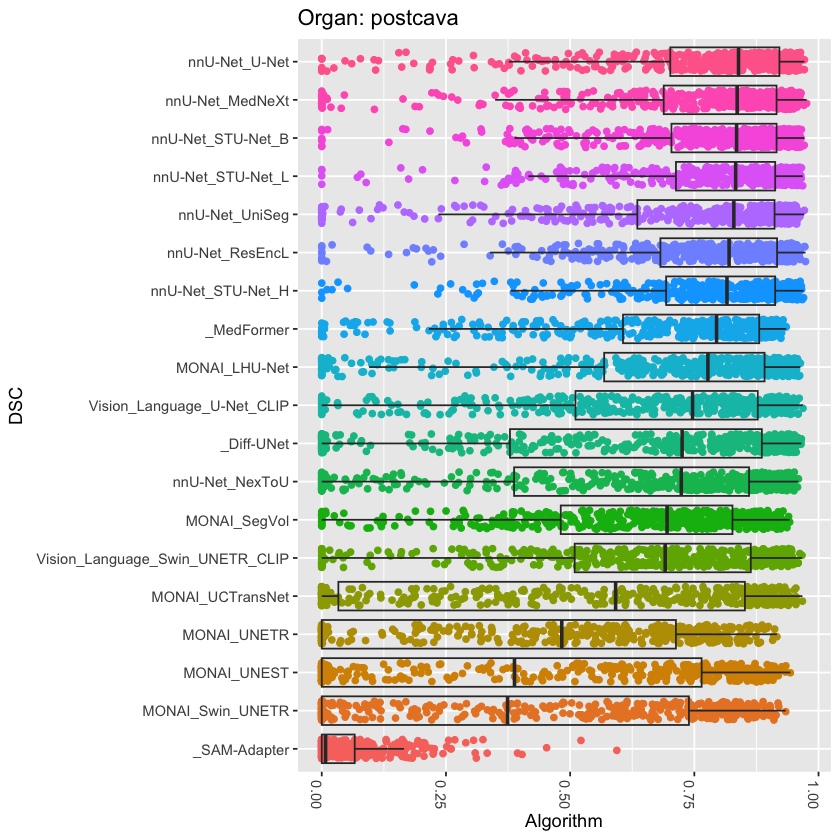

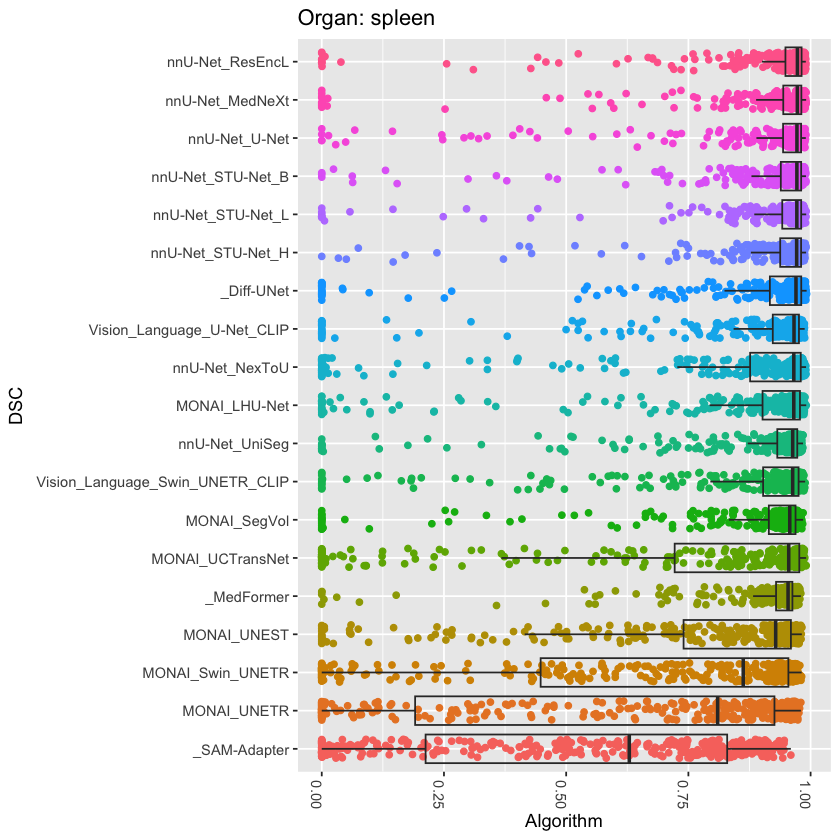

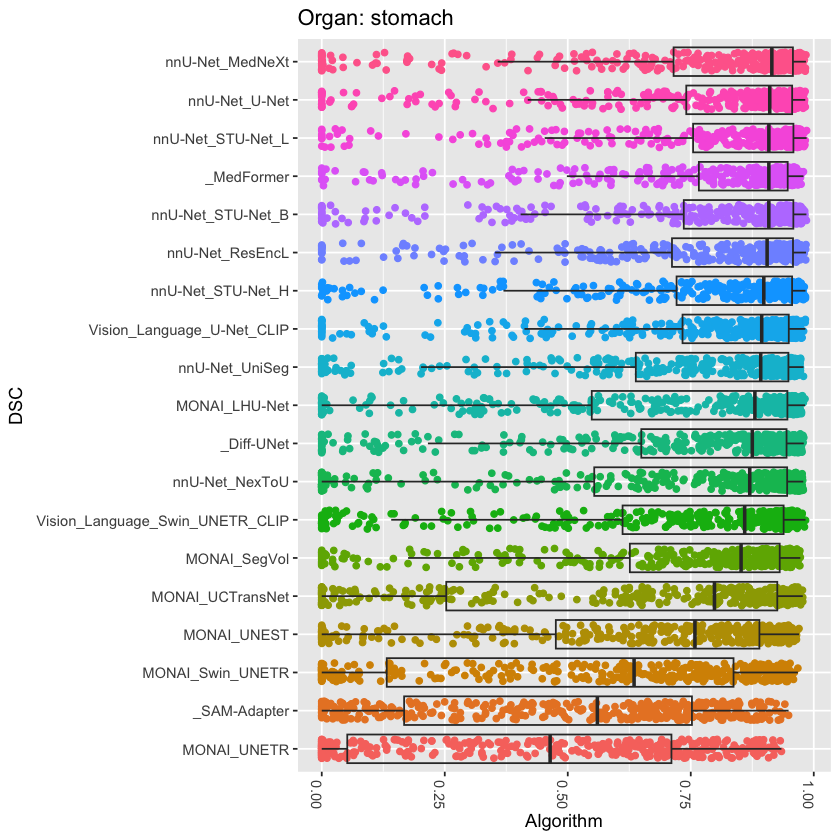

In [19]:
# ---------------------------------------------------
# 0) Packages
# ---------------------------------------------------
library(challengeR)
library(dplyr)
library(purrr)
library(readr)
library(ggplot2)

# ---------------------------------------------------
# 1) Set up
# ---------------------------------------------------
parent_dir <- "./totalsegmentator_results"
model_dirs <- list.dirs(parent_dir, recursive = FALSE)

# The organs you have columns for:
organs <- c("aorta", "gall_bladder", "kidney_left", "kidney_right",
            "liver", "pancreas", "postcava", "spleen", "stomach")

# We'll store the final boxplots in a list
boxplots <- list()

# ---------------------------------------------------
# 2) For each organ, gather data from all model dirs
# ---------------------------------------------------
for (org in organs) {

  message("Processing organ: ", org)

  # Read from all model dirs & keep only 'name' + that organ
  df_all <- map_dfr(model_dirs, function(mdir) {
    csv_file <- file.path(mdir, "dsc.csv")
    if (!file.exists(csv_file)) {
      message("Skipping: no dsc.csv in ", mdir)
      return(NULL)
    }
    tmp <- read_csv(csv_file, show_col_types = FALSE)

    # Each CSV has 'name', plus columns for the 9 organs
    # We'll keep 'name' and the current 'org' column
    # But check that 'org' column exists
    if (!org %in% names(tmp)) {
      message("Skipping: column ", org, " not found in ", csv_file)
      return(NULL)
    }

    tmp <- tmp %>%
      select(name, all_of(org))

    # Rename columns to fit as.challenge()
    # 'case' => name
    # 'value' => the organ column
    tmp <- tmp %>%
      rename(case = name, value = !!org) %>%
      mutate(algo = basename(mdir))   # model name from subdir
  })

  # If no data was read, skip
  if (nrow(df_all) == 0) {
    message("No data for organ ", org, " - skipping.")
    next
  }

  # ---------------------------------------------------
  # 3) Construct challenge & compute ranking
  # ---------------------------------------------------
  # Single-task challenge for this organ
  chal <- as.challenge(
    df_all,
    algorithm = "algo",
    case      = "case",
    value     = "value",
    taskName  = org,        # label the task as the organ
    smallBetter = TRUE,     # Reverse ordering here
    na.treat    = "na.rm"    # remove rows with NA
  )

  ranking <- chal %>%
    aggregateThenRank(FUN = median, ties.method = "min")

  # ---------------------------------------------------
  # 4) Create boxplot for this organ, with algo on Y
  # ---------------------------------------------------
  # By default, challengeR::boxplot() puts algo on X-axis,
  # so we can just add + coord_flip() to swap.
  p <- boxplot(ranking) +
       coord_flip() +
       ggtitle(paste("Organ:", org)) +
       xlab("DSC") +
       ylab("Algorithm")

  # Store in a list
  boxplots[[org]] <- p
}

# ---------------------------------------------------
# 5) Inspect or save the resulting list of plots
# ---------------------------------------------------
# For example, print them in console:
# boxplots[["liver"]]
# boxplots[["kidney_left"]]
# etc.

# Optionally, you could loop & save each to PDF
# for (org in names(boxplots)) {
#   ggsave(filename=paste0(org,"_boxplot.pdf"), boxplots[[org]],
#          width=6, height=4)
# }


library(patchwork)   # if not installed: install.packages("patchwork")

combined_plot <- wrap_plots(boxplots, ncol = 3)
print(combined_plot)


for (p in boxplots) {
  print(p)
  Sys.sleep(1)  # optional: pause between plots
}


## Boxplot top-5

Processing organ: aorta

Skipping: no dsc.csv in ./totalsegmentator_results/final_14dec2024_results

Note: 2449 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.

Processing organ: gall_bladder

Skipping: no dsc.csv in ./totalsegmentator_results/final_14dec2024_results

Note: 11416 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.

Processing organ: kidney_left

Skipping: no dsc.csv in ./totalsegmentator_results/final_14dec2024_results

Note: 8414 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.

Processing organ: kidney_right

Skipping: no dsc.csv in ./totalsegmentator_results/final_14dec2024_results

Note: 8792 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.

Processing organ: liver

Skipping: no dsc.csv in ./totalsegmentator_results/final_14dec2024_results

Note: 5624 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.

Processing organ: pancreas

Skipping: no dsc.csv in ./totalsegmentator_results/final_14dec2024_results

Note: 8414 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.

Processing organ: postcava

Skipping: no dsc.csv in ./totalsegmentator_results/final_14dec2024_results

Note: 4922 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.

Processing organ: spleen

Skipping: no dsc.csv in ./totalsegmentator_results/final_14dec2024_results

Note: 6577 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.

Processing organ: stomach

Skipping: no dsc.csv in ./totalsegmentator_results/final_14dec2024_results

Note: 6279 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.



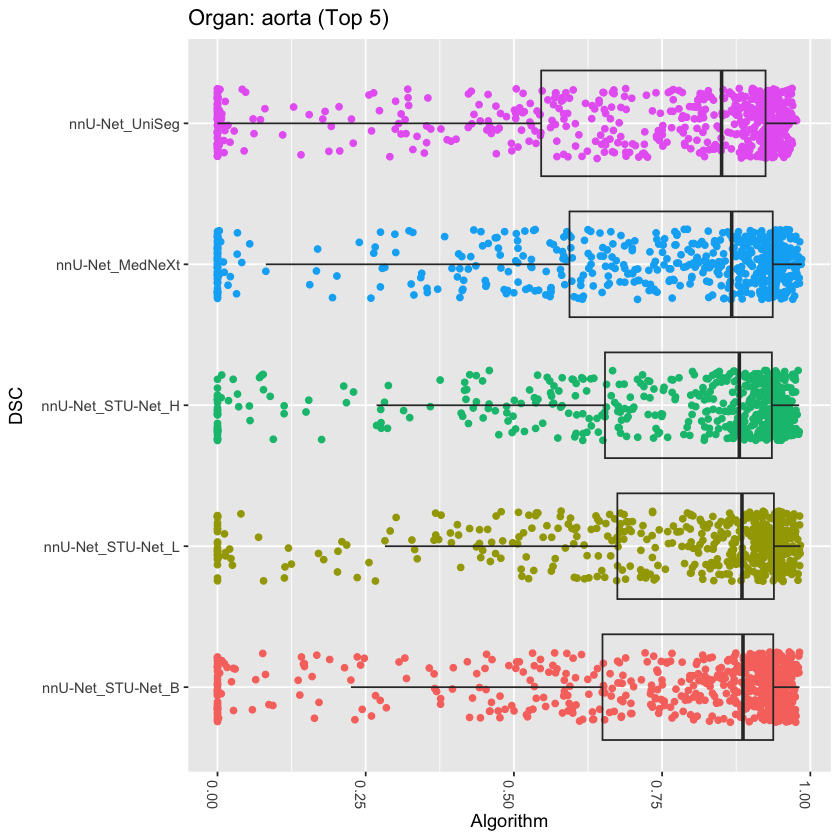

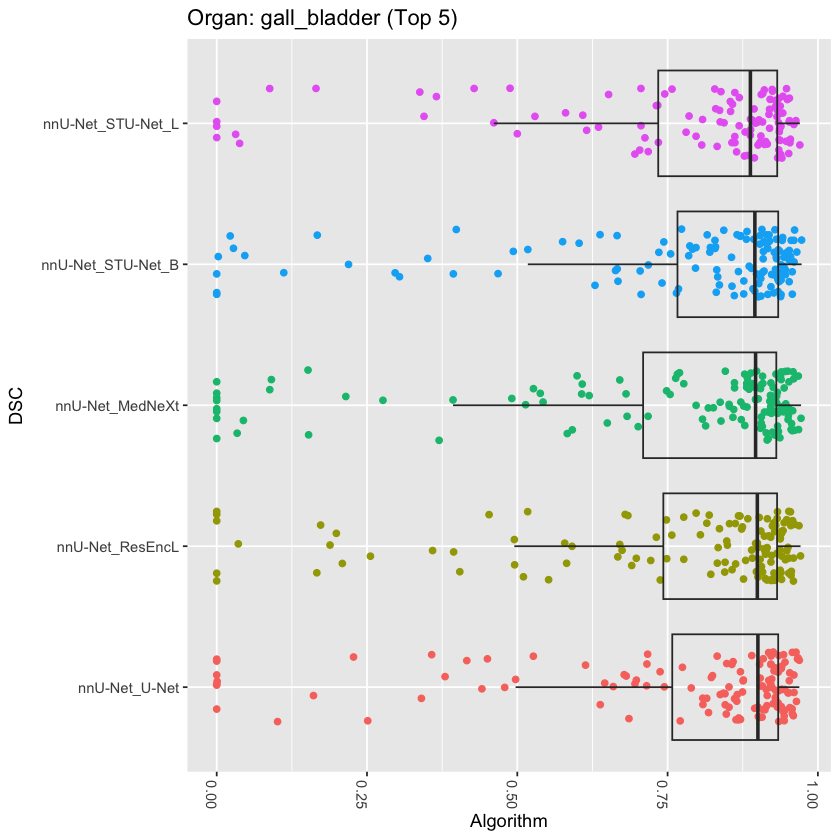

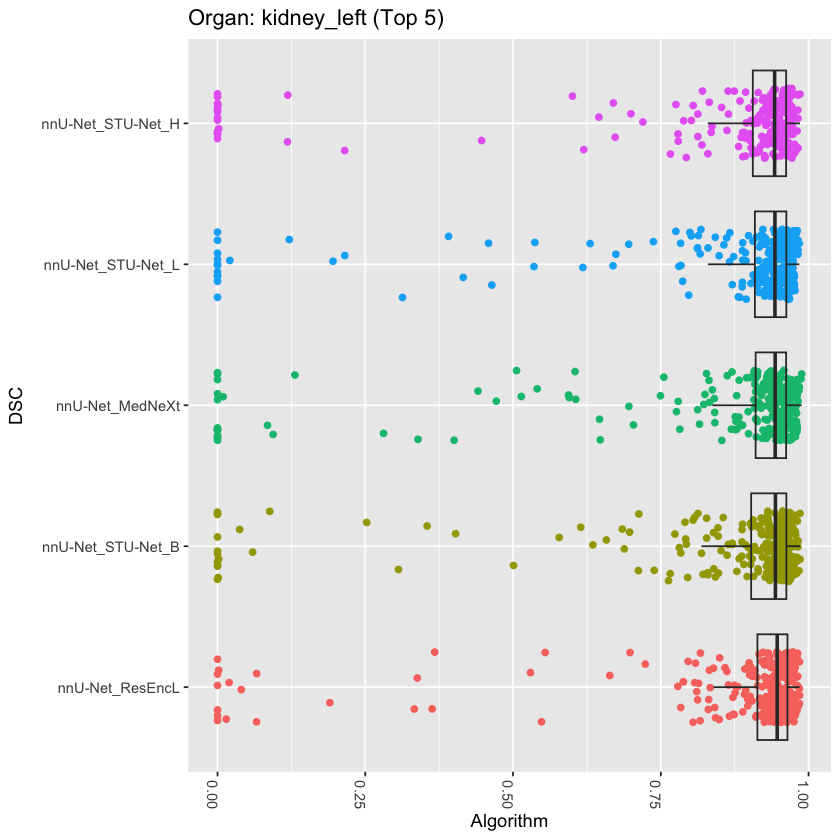

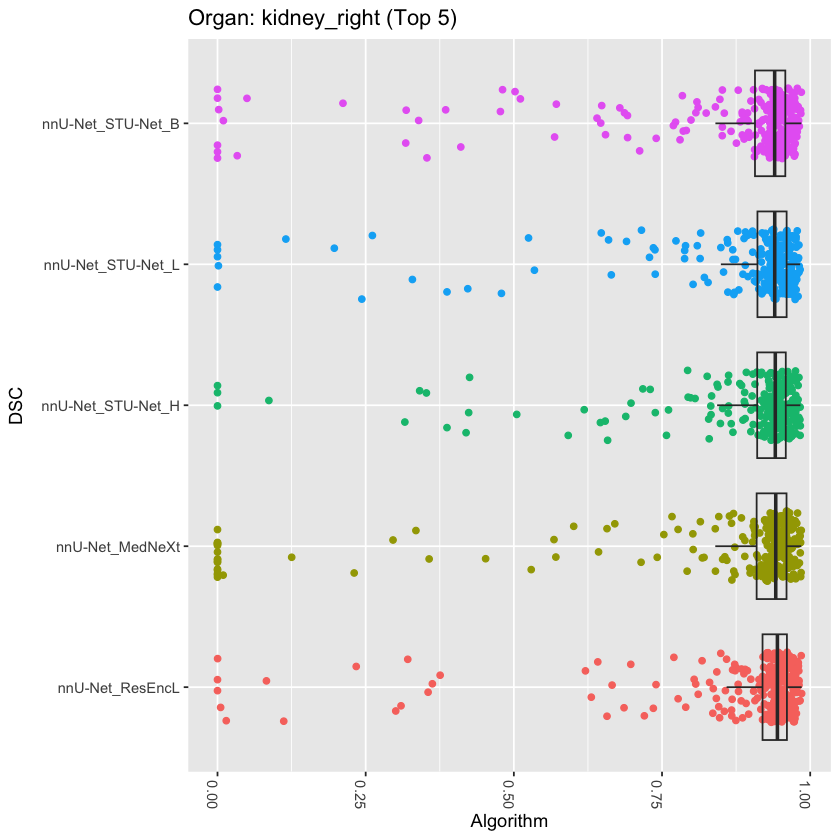

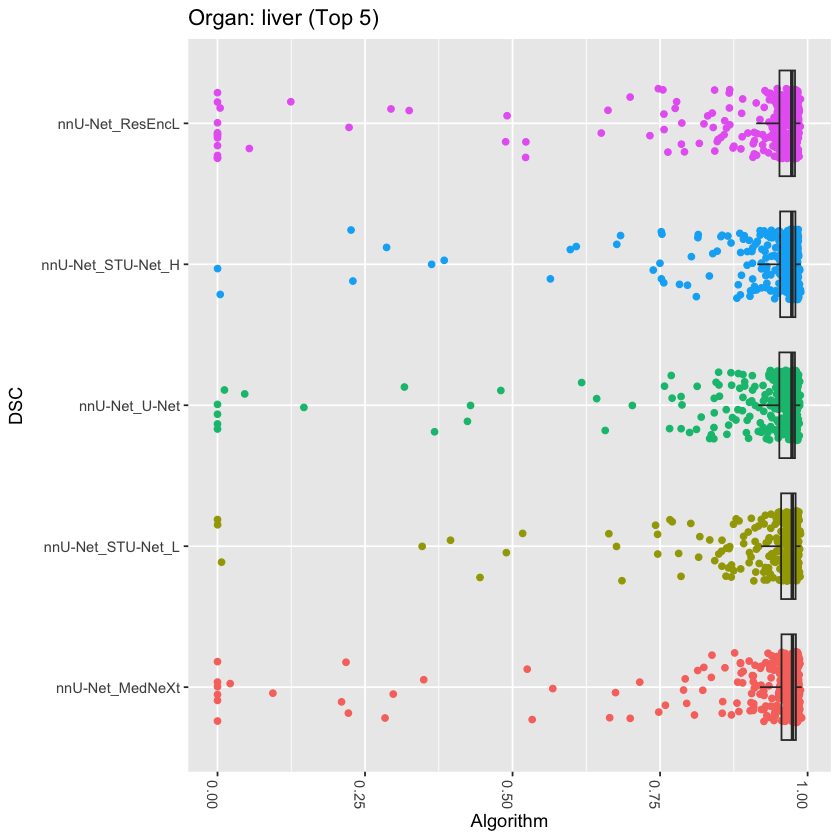

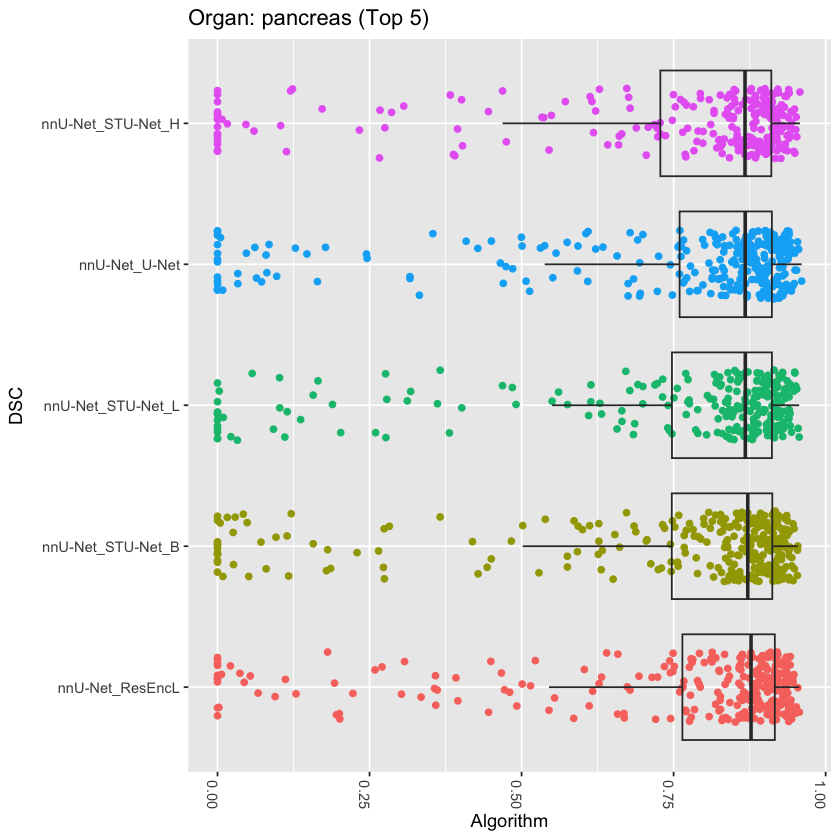

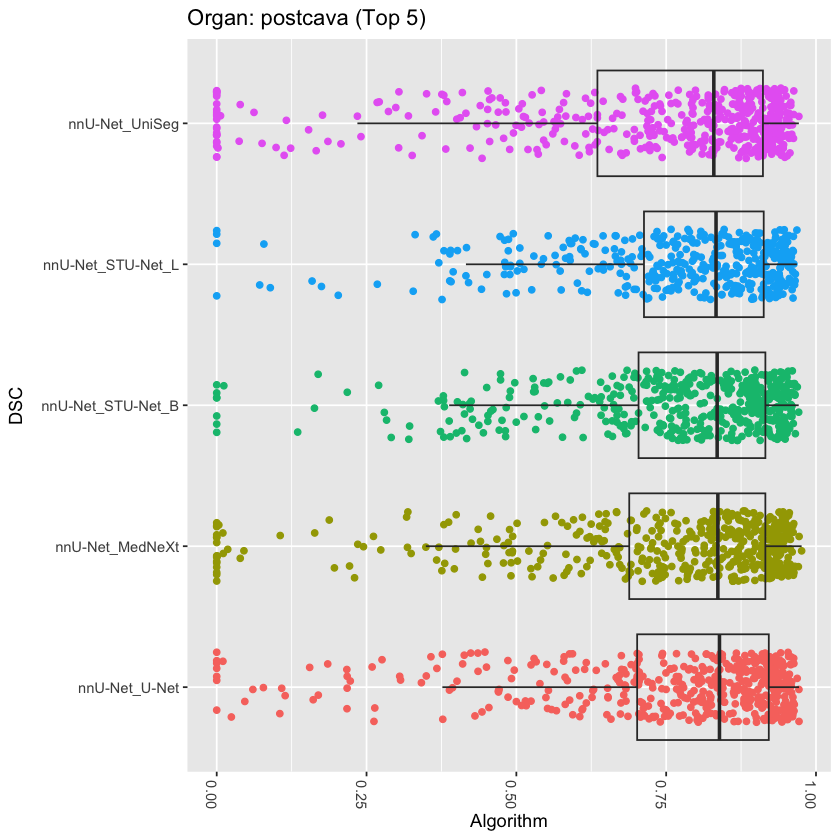

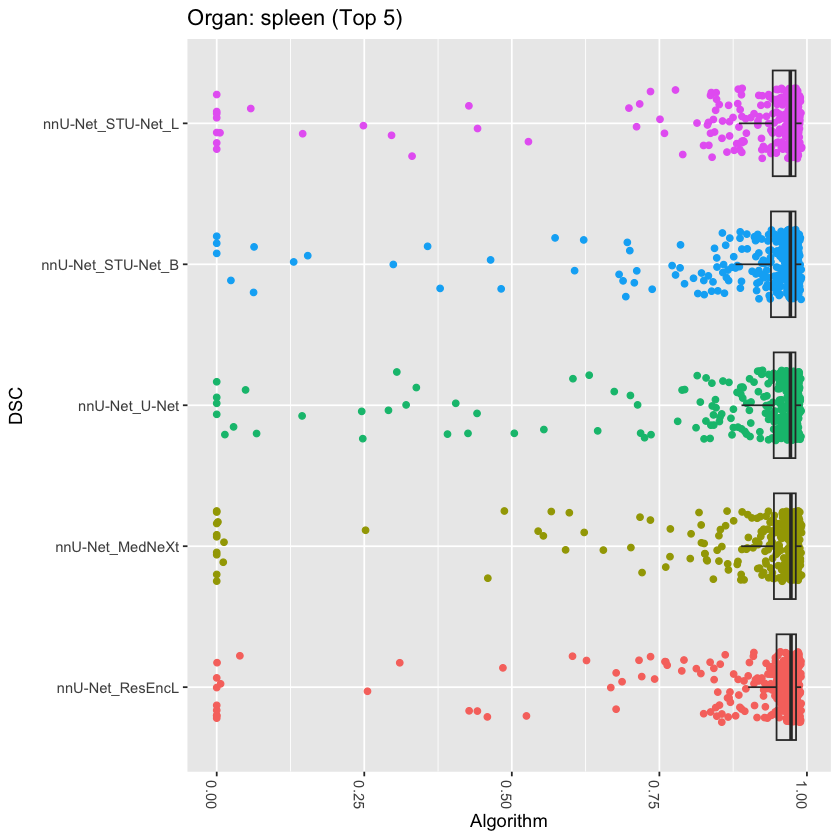

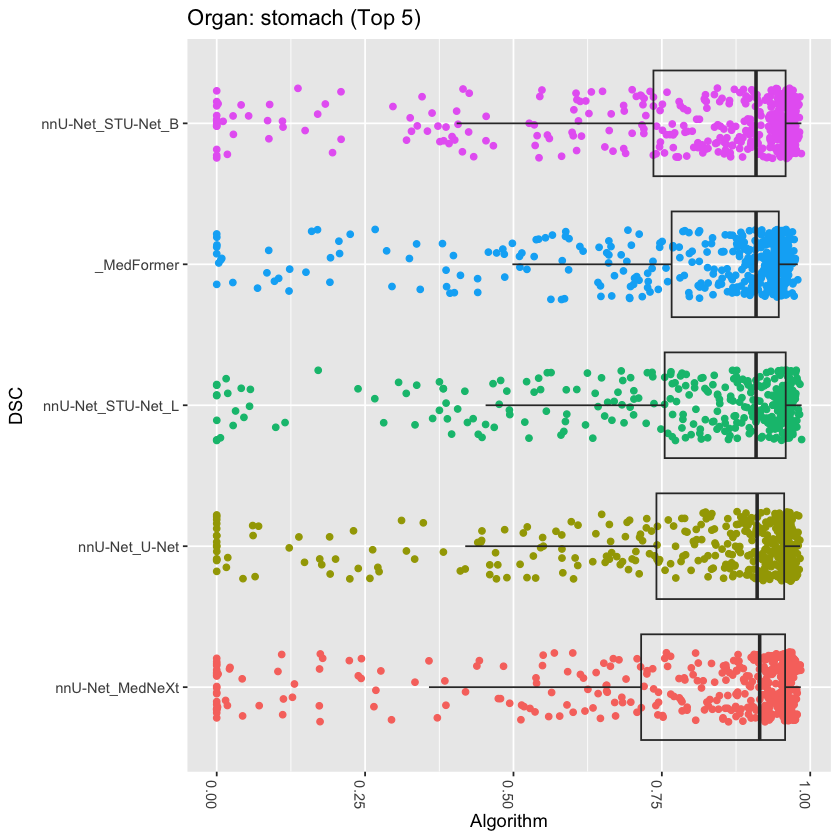

In [7]:
# ---------------------------------------------------
# 0) Packages
# ---------------------------------------------------
library(challengeR)
library(dplyr)
library(purrr)
library(readr)
library(ggplot2)

# ---------------------------------------------------
# 1) Set up
# ---------------------------------------------------
parent_dir <- "./totalsegmentator_results"
model_dirs <- list.dirs(parent_dir, recursive = FALSE)

# The 9 organs you have columns for:
organs <- c("aorta", "gall_bladder", "kidney_left", "kidney_right",
            "liver", "pancreas", "postcava", "spleen", "stomach")

# We'll store the final boxplots in a list
boxplots <- list()

# ---------------------------------------------------
# 2) For each organ, gather data from all model dirs
# ---------------------------------------------------
for (org in organs) {
  message("Processing organ: ", org)

  # Gather CSV from each model directory
  df_all <- map_dfr(model_dirs, function(mdir) {
    csv_file <- file.path(mdir, "dsc.csv")
    if (!file.exists(csv_file)) {
      message("Skipping: no dsc.csv in ", mdir)
      return(NULL)
    }
    tmp <- read_csv(csv_file, show_col_types = FALSE)

    if (!org %in% names(tmp)) {
      message("Skipping: column ", org, " not found in ", csv_file)
      return(NULL)
    }

    # Keep only 'name' and the column for this organ
    tmp <- tmp %>%
      select(name, all_of(org)) %>%
      rename(case = name, value = !!org) %>%
      mutate(algo = basename(mdir))
  })

  # If no data was read, skip
  if (nrow(df_all) == 0) {
    message("No data for organ ", org, " - skipping.")
    next
  }

  # ---------------------------------------------------
  # 3) Construct challenge & compute ranking
  # ---------------------------------------------------
  # Single-task challenge for this organ
  chal <- as.challenge(
    df_all,
    algorithm   = "algo",
    case        = "case",
    value       = "value",
    taskName    = org,       
    smallBetter = FALSE,     # lower rank is better
    na.treat    = "na.rm"   
  )

  ranking <- chal %>%
    aggregateThenRank(FUN = median, ties.method = "min")

  # ---------------------------------------------------
  # 4) Restrict to top 5 algorithms
  # ---------------------------------------------------
  # subset(..., top=5) returns a new "ranking" object 
  # containing only the top 5 (or more, if ties).
  ranking_top5 <- subset(ranking, top = 5)

  # ---------------------------------------------------
  # 5) Create boxplot for these top 5 algorithms
  # ---------------------------------------------------
  # 'boxplot(ranking_top5)' will automatically show only 
  # the included algorithms. Then we do coord_flip().
  p <- boxplot(ranking_top5) +
       coord_flip() +
       ggtitle(paste("Organ:", org, "(Top 5)")) +
       xlab("DSC") +
       ylab("Algorithm")

  # Store the plot in our list
  boxplots[[org]] <- p
}

# ---------------------------------------------------
# 6) Visualize the resulting plots individually
# ---------------------------------------------------
# Instead of combining them into a grid (which makes them tiny),
# print each plot one at a time.
for (p in boxplots) {
  print(p)
  Sys.sleep(1)  # Optional: pause between plots; adjust or remove as needed.
}


In [ ]:
# ?aggregateThenRank

## Violin Plot

Processing organ: aorta

Skipping: no dsc.csv in ./totalsegmentator_results/final_14dec2024_results

Note: 2449 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.





Summary Kendall's tau:


|Task  |   mean| median| q25| q75|
|:-----|------:|------:|---:|---:|
|aorta | 0.8276|    0.8| 0.8|   1|


Processing organ: gall_bladder

Skipping: no dsc.csv in ./totalsegmentator_results/final_14dec2024_results

Note: 11416 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.





Summary Kendall's tau:


|Task         |   mean| median| q25| q75|
|:------------|------:|------:|---:|---:|
|gall_bladder | 0.3464|    0.4|   0| 0.6|


Processing organ: kidney_left

Skipping: no dsc.csv in ./totalsegmentator_results/final_14dec2024_results

Note: 8414 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.





Summary Kendall's tau:


|Task        |   mean| median| q25| q75|
|:-----------|------:|------:|---:|---:|
|kidney_left | 0.6792|    0.8| 0.6| 0.8|


Processing organ: kidney_right

Skipping: no dsc.csv in ./totalsegmentator_results/final_14dec2024_results

Note: 8792 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.





Summary Kendall's tau:


|Task         |   mean| median| q25| q75|
|:------------|------:|------:|---:|---:|
|kidney_right | 0.6168|    0.6| 0.4| 0.8|


Processing organ: liver

Skipping: no dsc.csv in ./totalsegmentator_results/final_14dec2024_results

Note: 5624 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.





Summary Kendall's tau:


|Task  |   mean| median| q25| q75|
|:-----|------:|------:|---:|---:|
|liver | 0.6416|    0.6| 0.4| 0.8|


Processing organ: pancreas

Skipping: no dsc.csv in ./totalsegmentator_results/final_14dec2024_results

Note: 8414 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.





Summary Kendall's tau:


|Task     |   mean| median| q25| q75|
|:--------|------:|------:|---:|---:|
|pancreas | 0.5096|    0.6| 0.2| 0.8|


Processing organ: postcava

Skipping: no dsc.csv in ./totalsegmentator_results/final_14dec2024_results

Note: 4922 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.





Summary Kendall's tau:


|Task     |   mean| median| q25| q75|
|:--------|------:|------:|---:|---:|
|postcava | 0.4456|    0.4| 0.2| 0.6|


Processing organ: spleen

Skipping: no dsc.csv in ./totalsegmentator_results/final_14dec2024_results

Note: 6577 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.





Summary Kendall's tau:


|Task   |   mean| median| q25| q75|
|:------|------:|------:|---:|---:|
|spleen | 0.4576|    0.4| 0.2| 0.6|


Processing organ: stomach

Skipping: no dsc.csv in ./totalsegmentator_results/final_14dec2024_results

Note: 6279 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.





Summary Kendall's tau:


|Task    |   mean| median| q25| q75|
|:-------|------:|------:|---:|---:|
|stomach | 0.2844|    0.3|   0| 0.6|


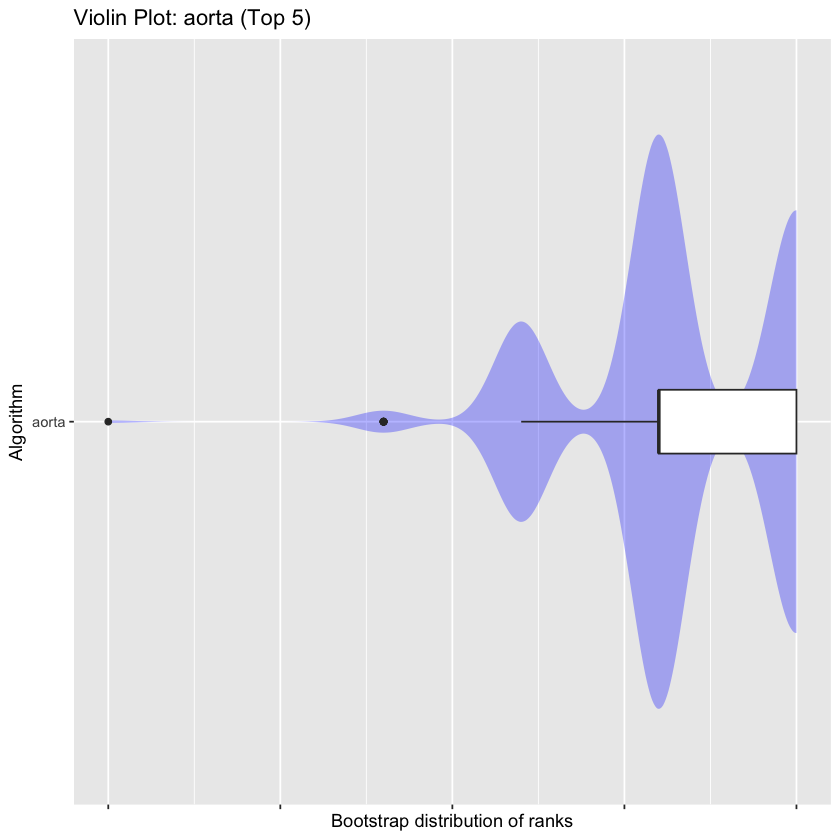

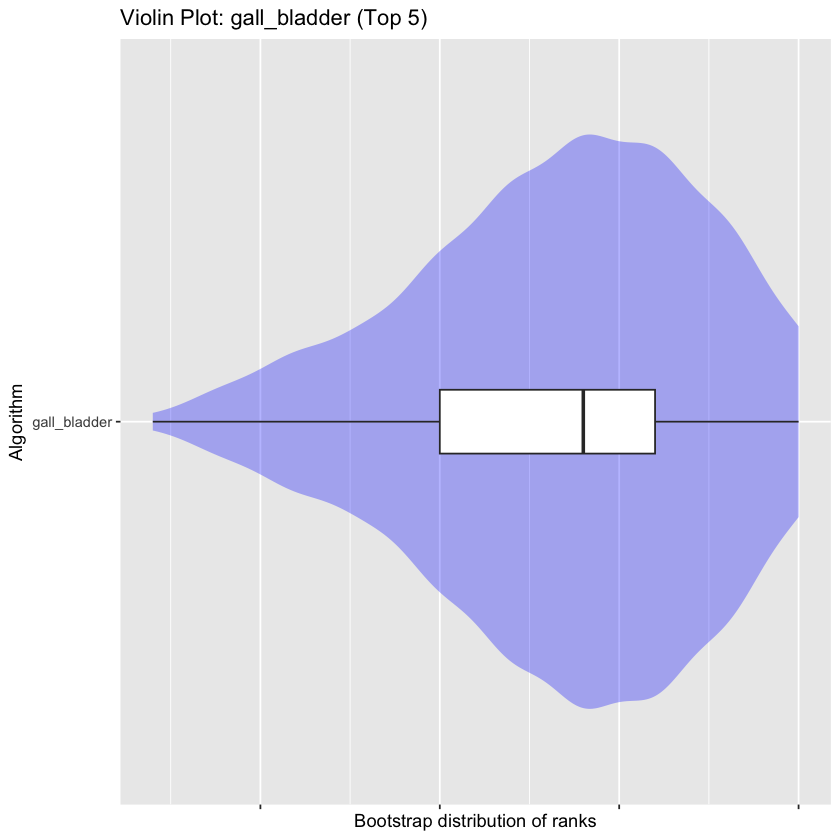

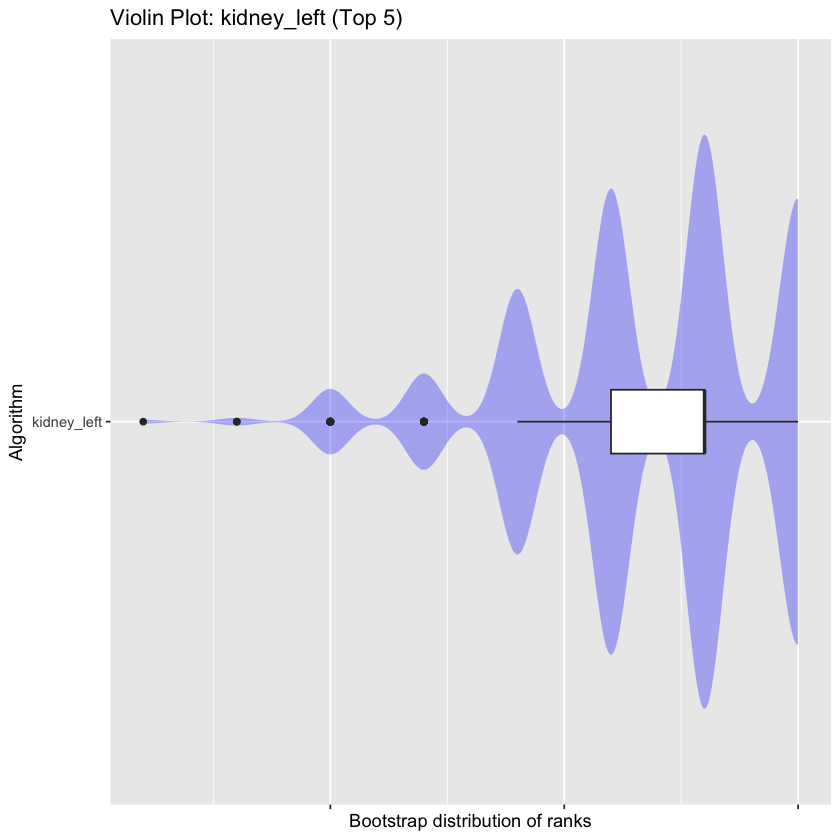

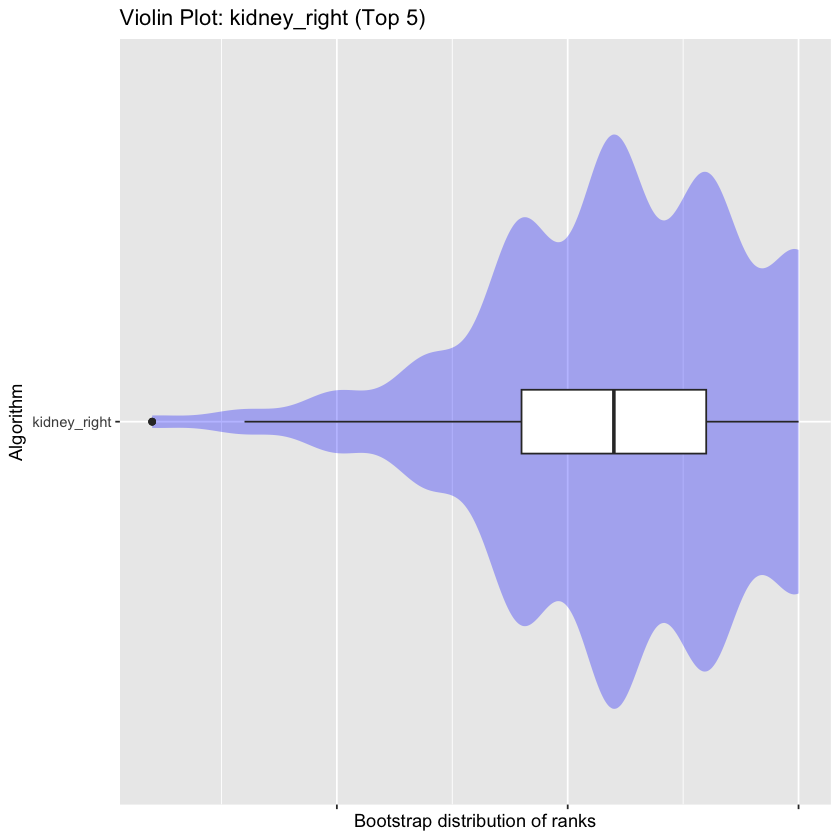

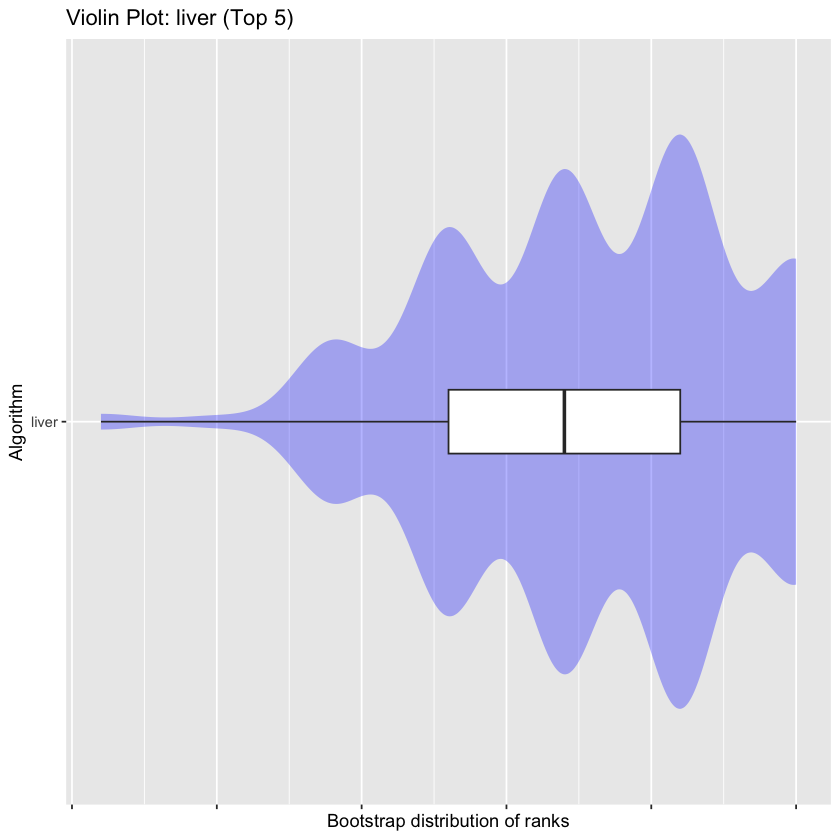

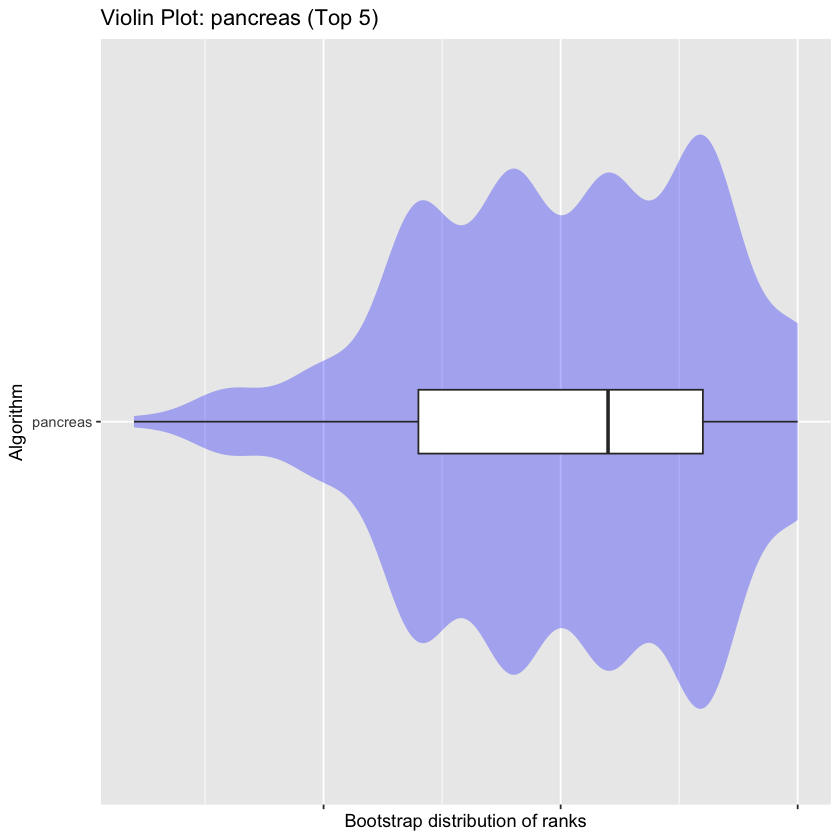

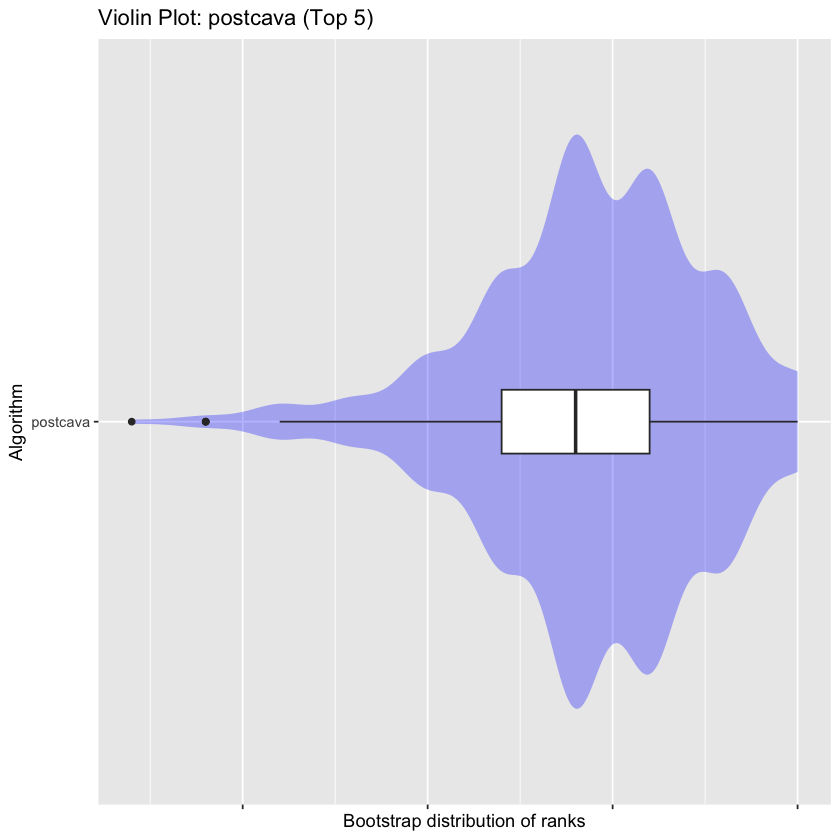

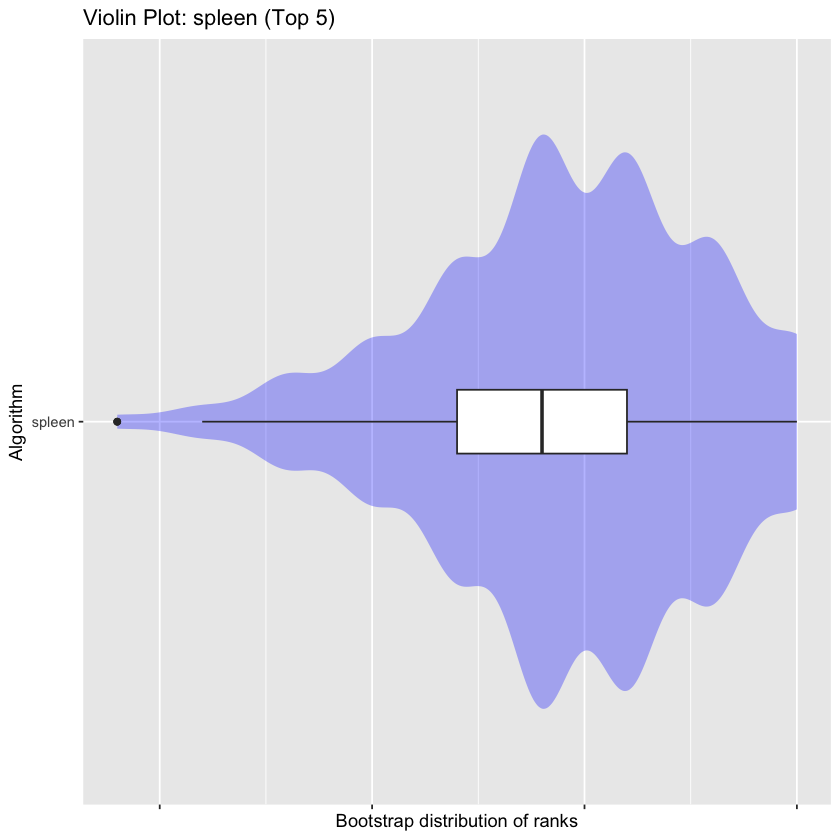

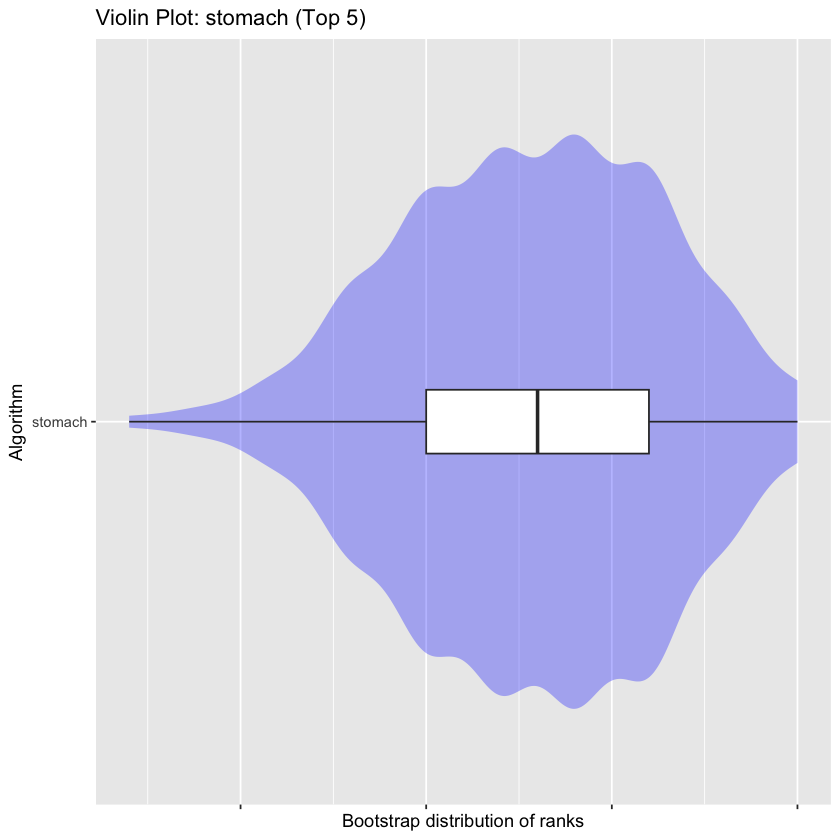

In [14]:
# ---------------------------------------------------
# 0) Packages
# ---------------------------------------------------
library(challengeR)
library(dplyr)
library(purrr)
library(readr)
library(ggplot2)

# ---------------------------------------------------
# 1) Set up
# ---------------------------------------------------
parent_dir <- "./totalsegmentator_results"
model_dirs <- list.dirs(parent_dir, recursive = FALSE)

# The 9 organs you have columns for:
organs <- c("aorta", "gall_bladder", "kidney_left", "kidney_right",
            "liver", "pancreas", "postcava", "spleen", "stomach")

# We'll store the final violin plots in a list
violinplots <- list()

# ---------------------------------------------------
# 2) For each organ, gather data and produce violin plot
# ---------------------------------------------------
for (org in organs) {
  message("Processing organ: ", org)

  # Gather CSV from each model directory
  df_all_for_this_organ <- map_dfr(model_dirs, function(mdir) {
    csv_file <- file.path(mdir, "dsc.csv")
    if (!file.exists(csv_file)) {
      message("Skipping: no dsc.csv in ", mdir)
      return(NULL)
    }
    tmp <- read_csv(csv_file, show_col_types = FALSE)

    if (!org %in% names(tmp)) {
      message("Skipping: column ", org, " not found in ", csv_file)
      return(NULL)
    }

    tmp <- tmp %>%
      select(name, all_of(org)) %>%
      rename(case = name, value = !!org) %>%
      mutate(algo = basename(mdir))
  })

  # If no data was read, skip
  if (nrow(df_all_for_this_organ) == 0) {
    message("No data for organ ", org, " - skipping.")
    next
  }

  # ---------------------------------------------------
  # 3) Construct challenge & compute ranking
  # ---------------------------------------------------
  chal <- as.challenge(
    df_all_for_this_organ,
    algorithm   = "algo",
    case        = "case",
    value       = "value",
    taskName    = org,       
    smallBetter = FALSE,  # or TRUE if you want smaller DSC => better
    na.treat    = "na.rm"
  )

  ranking <- chal %>%
    aggregateThenRank(FUN = median, ties.method = "min")

  # ---------------------------------------------------
  # 4) Restrict to top 5 algorithms
  # ---------------------------------------------------
  ranking_top5 <- subset(ranking, top = 5)

  # ---------------------------------------------------
  # 5) Bootstrap the top-5 ranking
  # ---------------------------------------------------
  # 'violin()' requires a *bootstrapped* ranking.
  rankingBoot <- ranking_top5 %>%
    bootstrap(nboot = 500, parallel = FALSE, progress = "none")

  # ---------------------------------------------------
  # 6) Create violin plot
  # ---------------------------------------------------
  # This is a violin of rank distributions, not DSC values.
  p <- violin(rankingBoot) +
       coord_flip() +
       ggtitle(paste("Violin Plot:", org, "(Top 5)")) +
       xlab("Algorithm") +
       ylab("Bootstrap distribution of ranks")

  # Store the plot in our list
  violinplots[[org]] <- p
}

# ---------------------------------------------------
# 7) Visualize the resulting violin plots individually
# ---------------------------------------------------
for (p in violinplots) {
  print(p)
  Sys.sleep(1)  # Optional: pause between plots
}


### PDF output - significance maps?

In [ ]:
##############################################
## 0) Required packages
##############################################
library(dplyr)
library(tidyr)
library(challengeR)
library(ggplot2)   # for any final patchwork usage or theme
# Optionally: library(patchwork) or cowplot, if you want to combine subplots

##############################################
## 1) List all subfolders that contain DSC files
##############################################
# Suppose your structure is "totalsegmentator_results/NAME_OF_MODEL/dsc.csv".
# We'll get a list of subdirectories that contain "dsc.csv".
base_dir <- "totalsegmentator_results"

# A simple approach: get all subfolders, keep those with "dsc.csv"
all_subdirs <- list.dirs(base_dir, full.names = TRUE, recursive = FALSE)

# For each subdir, check if "dsc.csv" exists
model_info <- data.frame()
for (subdir in all_subdirs) {
  dsc_path <- file.path(subdir, "dsc.csv")
  if (file.exists(dsc_path)) {
    model_name <- basename(subdir)  # e.g. "nnU-Net_U-Net", "MONAI_LHU-Net", etc.
    model_info <- rbind(model_info,
                        data.frame(model_name = model_name,
                                   file_path  = dsc_path,
                                   stringsAsFactors = FALSE))
  }
}
# 'model_info' now has columns: model_name, file_path

##############################################
## 2) Read each model's DSC.csv, pivot longer
##############################################
all_data_long <- data.frame()

for (i in seq_len(nrow(model_info))) {
  this_model <- model_info$model_name[i]
  this_file  <- model_info$file_path[i]

  # read CSV => each row is one 'name' (case), columns are organs
  df_wide <- read.csv(this_file, stringsAsFactors = FALSE)

  # pivot longer => columns: name, organ, dsc
  df_long <- df_wide %>%
    pivot_longer(
      cols = -name,    # pivot all columns except "name"
      names_to = "organ",
      values_to = "dsc"
    )
  # Label the algorithm
  df_long$Algorithm <- this_model

  # combine
  all_data_long <- bind_rows(all_data_long, df_long)
}

##############################################
## 3) Build a challenge object
##############################################
my_challenge <- as.challenge(
  object      = all_data_long,
  case        = "name",       # the column identifying each scan
  algorithm   = "Algorithm",  # the column labeling each model
  value       = "dsc",        # the DSC column
  by          = "organ",      # treat each 'organ' as a separate "task"
  smallBetter = FALSE,        # larger DSC is better
  na.treat    = "na.rm",      # drop NA entries
  check       = TRUE
)

##############################################
## 4) Convert to a ranked format
##############################################
# For boxplots in challengeR we can do either:
#  -- boxplot() on a "ranked.list" object
#  -- or boxplot() on the raw "challenge" object (which internally calls rank).
#
# Typically you'd do rank(...) first so challengeR knows the order of algorithms.
# ties.method="min" is typical, but you can pick "average", etc.
##############################################
my_ranked <- rank(my_challenge, ties.method = "min")

##############################################
## 5) Produce the boxplots
##############################################
# The function boxplot.ranked.list(...) returns a list of ggplots, one per organ
# with both dot/jitter and box‐and‐whiskers. By default they share a single color legend.
# You can do something like:
##############################################
plot_list <- boxplot(my_ranked,
                     jitter.width = 0.3)  # can tweak

# This returns a list of ggplot objects, one for each organ.
# If you just have 1 or 2 organs, printing them individually is easy:
# e.g. print(plot_list[["liver"]]) or something.

# If you have many organs, you can arrange them in a grid with patchwork or cowplot:
# For example, if you want them all in one PDF:
pdf("JHH_Boxplots_AllOrgans.pdf", width=10, height=8)
for (plt in plot_list) {
  print(plt)
  # or you can do e.g. patchwork::wrap_plots(plot_list) if you prefer a single page
}
dev.off()

##############################################
## 6) That’s it!
##############################################
# Now you have a set of boxplots (one per organ).
# Each boxplot shows a dot swarm + box, colored by 'Algorithm'.
# This is similar to the "Figure 15" style from the paper (distribution of DSC across each organ).
